## Homework 1 Solutions
### CSCI 4270 / 6270
### Due: January 19, 2024


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

## Problem 1


In [69]:
def p1_checker(fname, m, n):
    img = cv2.imread(fname)
    height, width, _ = img.shape
    crop_size = min(height, width)

    # Calculate the top left point of the crop
    x = (width - crop_size) // 2
    y = (height - crop_size) // 2

    # Crop the image
    cimg = img[y:y+crop_size, x:x+crop_size]

    max_dim = max(cimg.shape)
    scale = m / max_dim
    new_height = int(cimg.shape[0] * scale)
    new_width = int(cimg.shape[1] * scale)
    im0 = cv2.resize(cimg, (new_width, new_height))
    im1 = np.transpose(im0, (1, 0, 2))
    im2 = np.transpose(np.flip(im0, axis=0), (1, 0, 2))
    im3 = np.flip(im0, axis=0)
    im4 = np.concatenate((im0, im1))
    im5 = np.concatenate((im2, im3))
    im = np.concatenate((im4, im5), axis=1)

    im = np.tile(im, (n, n, 1))

    print(im.shape)
    display = im[:, :, ::-1]
    plt.axis("off")
    plt.imshow(display)
    plt.show()

(400, 400, 3)


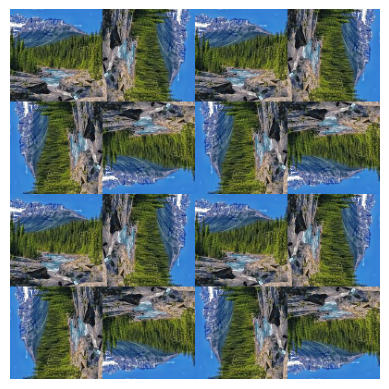

In [70]:
fn = './images/mountain.jpg'
m = 100
n = 2

p1_checker(fn, m, n)

In [ ]:
fn = './images/eagle.jpg'
m = 64
n = 8

p1_checker(fn, m, n)

## Problem 2



In [12]:
def p2_vignette(fn, r0, c0):
    img = cv2.imread(fn)
    plt.axis("off")
    cImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cImg)
    plt.show()
    maxD = np.sqrt(max(r0, img.shape[0] - 1 - r0) ** 2 + max(c0, img.shape[1] - 1 - c0) ** 2)
    rows, cols = np.ogrid[:img.shape[0], :img.shape[1]]
    dist = np.sqrt((rows - r0) ** 2 + (cols - c0) ** 2)
    weights = 1 - np.sqrt(dist / maxD)
    weights = np.expand_dims(weights, axis=2)
    expweights = np.repeat(weights, img.shape[2], axis=2)
    edited = img * expweights
    print("d_m: {:.1f}".format(maxD))
    M, N, _ = img.shape
    print("W[{},{}] = {:.2f}".format((M // 4),(N // 4), weights[(M // 4)][(N // 4)][0]))
    print("W[{},{}] = {:.2f}".format((M // 4), (3 * N // 4), weights[(M // 4)][(3 * N // 4)][0])) 
    print("W[{},{}] = {:.2f}".format((3 * M // 4),(N // 4), weights[(3 * M // 4)][(N // 4)][0])) 
    print("W[{},{}] = {:.2f}".format((3 * M // 4),(3 * N // 4), weights[(3 * M // 4)][(3 * N // 4)][0]))

    display = edited.astype('uint8')
    display = cv2.cvtColor(display, cv2.COLOR_BGR2RGB)

    print("I[{},{}] = {}".format((M // 4),(N // 4), display[(M // 4)][(N // 4)]))
    print("I[{},{}] = {}".format((M // 4),(3 * N // 4), display[(M // 4)][(3 * N // 4)])) 
    print("I[{},{}] = {}".format((3 * M // 4),(N // 4), display[(3 * M // 4)][(N // 4)])) 
    print("I[{},{}] = {}".format((3 * M // 4),(3 * N // 4), display[(3 * M // 4)][(3 * N // 4)]))
    
    plt.axis("off")
    plt.imshow(display)
    plt.show()

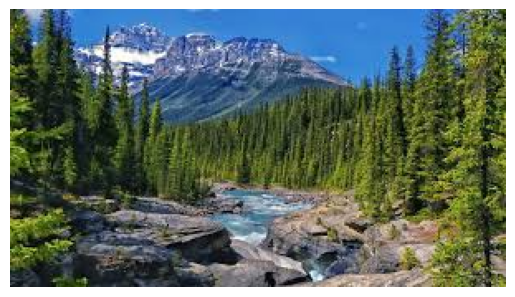

d_m: 223.6
W[42,75] = 0.21
W[42,225] = 0.47
W[126,75] = 0.24
W[126,225] = 0.60
I[42,75] = [12 17 34]
I[42,225] = [32 56 79]
I[126,75] = [27 26 21]
I[126,225] = [74 81 41]


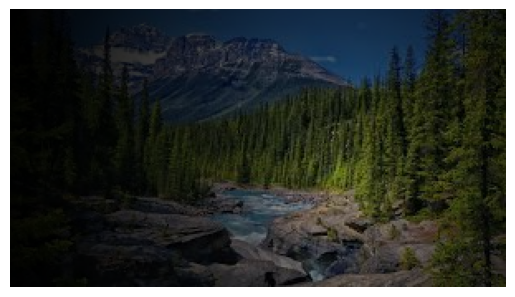

In [13]:
fn = "./images/mountain.jpg"
r0 = 100
c0 = 200

p2_vignette(fn, r0, c0)

In [ ]:
fn = "./images/skyline.jpg"
r0 = 130
c0 = 250

p2_vignette(fn, r0, c0)

## Problem 3


In [15]:
def p3_block(fn, m, n, b):
    img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
    plt.axis("off")
    plt.imshow(img, cmap='gray')
    plt.show()
    plt.pause(.1)
    plt.clf()
    s_m = img.shape[0] / m
    s_n = img.shape[1] / n
    downsized = np.zeros((m, n), dtype=np.float32)
    for i in range(m):
        for j in range(n):
            start_row, end_row = round(i * s_m), round((i + 1) * s_m)
            start_col, end_col = round(j * s_n), round((j + 1) * s_n)
            region = img[start_row:end_row, start_col:end_col]
            downsized[i, j] = np.mean(region)
    upscaled = np.repeat(np.repeat(downsized, b, axis=0), b, axis=1)
    med = np.median(downsized)
    binary = np.zeros_like(downsized)
    binary[downsized > med] = 1
    print("Downsized images are ({}, {})".format(downsized.shape[0], downsized.shape[1]))
    print("Block images are ({}, {})".format(upscaled.shape[0], upscaled.shape[1]))
    print("Average intensity at ({}, {}) is {:.1f}".format(m // 4, n // 4, downsized[m // 4][n // 4]))
    print("Average intensity at ({}, {}) is {:.1f}".format(m // 4, 3 * n // 4, downsized[m // 4][3 * n // 4]))
    print("Average intensity at ({}, {}) is {:.1f}".format(3 * m // 4, n // 4, downsized[3 * m // 4][n // 4]))
    print("Average intensity at ({}, {}) is {:.1f}".format(3 * m // 4, 3 * n // 4, downsized[3 * m // 4][3 * n // 4]))
    print("Binary threshold: {:.1f}".format(med))
    plt.axis("off")
    plt.imshow(downsized, cmap='gray')
    plt.show()
    plt.pause(.1)
    plt.clf()
    plt.axis("off")
    plt.imshow(binary, cmap='gray')
    plt.show()
    

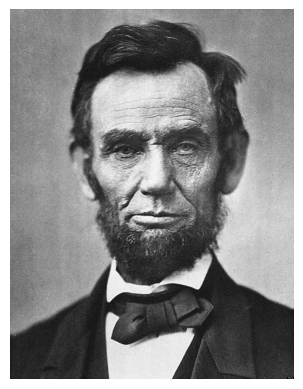

Downsized images are (25, 18)
Block images are (375, 270)
Average intensity at (6, 4) is 59.2
Average intensity at (6, 13) is 55.5
Average intensity at (18, 4) is 158.3
Average intensity at (18, 13) is 35.3
Binary threshold: 134.7


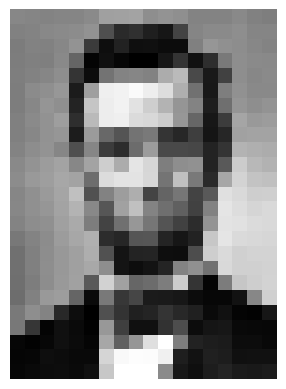

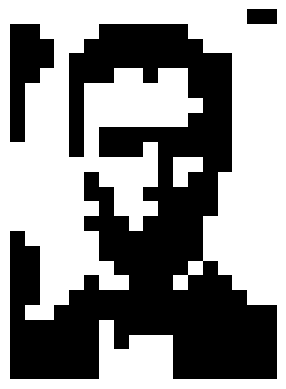

In [9]:
fname = "./images/lincoln1.jpg"
m = 25
n = 18
b = 15

p3_block(fname, m, n, b)

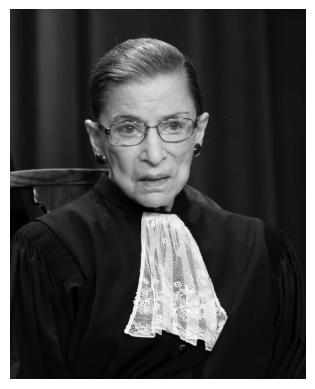

Downsized images are (30, 16)
Block images are (420, 224)
Average intensity at (7, 4) is 22.0
Average intensity at (7, 12) is 27.1
Average intensity at (22, 4) is 15.1
Average intensity at (22, 12) is 27.3
Binary threshold: 27.7


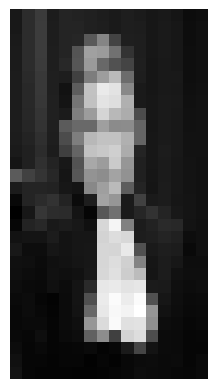

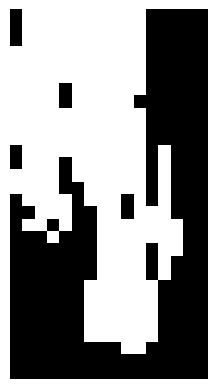

In [18]:
fname = "./images/ginsburg.jpg"
m = 30
n = 16
b = 14

p3_block(fname, m, n, b)